# Does the number of votes a movie recieves impact the movie's rating?

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as st

In [2]:
file = ("../Resources/final_df.csv")

In [3]:
#Read in csv
final_df = pd.read_csv(file)
final_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442
100252,474798,tt0953659,A Suitcaseful of Sex,1971,93,Comedy,5.4,22
100253,474868,tt0953903,Year 1863,1922,93,"Drama,History,Romance",6.4,15


In [4]:
#Remove unnecessary column
final_df = final_df.drop(columns = "Unnamed: 0")
final_df

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...
100250,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442
100252,tt0953659,A Suitcaseful of Sex,1971,93,Comedy,5.4,22
100253,tt0953903,Year 1863,1922,93,"Drama,History,Romance",6.4,15


In [5]:
#Set x and y values for entire dataset
x_values = final_df['numVotes']
y_values = final_df['averageRating']

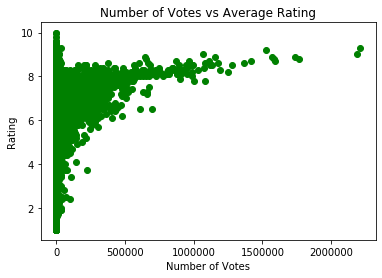

In [6]:
#Plot a scatterplot for entire dataset
plt.title("Number of Votes vs Average Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(x_values, y_values, marker = "o", color = "green")
plt.show()

In [7]:
print(f"The correlation coefficient between Number of Votes and Rating is {round(st.pearsonr(x_values,y_values)[0],2)}")

The correlation coefficient between Number of Votes and Rating is 0.11


In [8]:
#Create new x and y values based on a random sample (n=1000) from the entire dataset
random_x = final_df['numVotes'].sample(n = 1000, random_state = 1)
random_y = final_df['averageRating'].sample(n = 1000, random_state = 1)

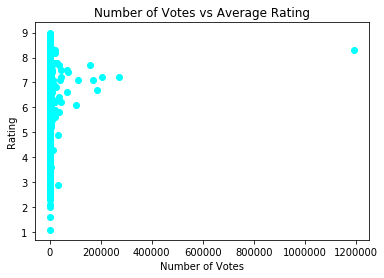

In [9]:
#plot scatterplot based on the random sample from entire dataset
plt.title("Number of Votes vs Average Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(random_x, random_y, marker = "o", color = "cyan")
plt.show()

In [10]:
print(f"The correlation coefficient between Number of Votes and Rating is {round(st.pearsonr(random_x,random_y)[0],2)}")

The correlation coefficient between Number of Votes and Rating is 0.09


In [11]:
#Create new dataframe that removes movies with more than 99 votes
less_100_df = final_df.loc[final_df['numVotes'] < 100]
less_100_df.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
2,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
5,tt0001285,The Life of Moses,1909,50,"Biography,Drama,Family",5.1,30


In [12]:
#set x and y values based on random sample (n=1000) from movies with less than 100 votes
less_100_x = less_100_df['numVotes'].sample(n = 1000, random_state = 1)
less_100_y = less_100_df['averageRating'].sample(n = 1000, random_state = 1)

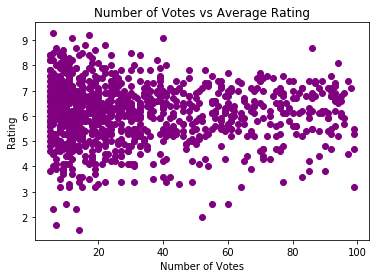

In [13]:
#plot scatterplot based on random sample from movies with under 100 votes
plt.title("Number of Votes vs Average Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(less_100_x, less_100_y, marker = "o", color = "purple")
plt.show()

In [14]:
print(f"The correlation coefficient between Number of Votes and Rating is {round(st.pearsonr(less_100_x, less_100_y)[0],2)}")

The correlation coefficient between Number of Votes and Rating is -0.03


In [15]:
#Create new dataframe that only contains movies that came out after 1970 
post_1970_df = final_df.loc[final_df["startYear"] >= 1970]
post_1970_df

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
9811,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76547
10463,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,246
12060,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
20727,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185
...,...,...,...,...,...,...,...
100248,tt0953478,Lilla sp??ket Laban,2006,45,"Animation,Family",6.3,63
100249,tt0953483,Made in GDR - Alles ?ªber meine Freunde,2007,93,Documentary,7.4,5
100250,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442


In [16]:
#set x and y values based on movies after 1970
post_1970_x = post_1970_df['numVotes']
post_1970_y = post_1970_df['averageRating']

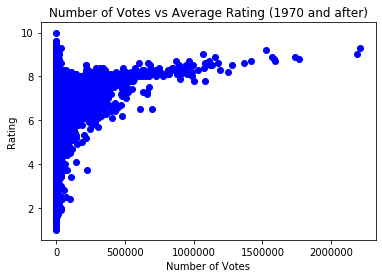

In [17]:
#plot scatterplot based on movies after 1970
plt.title("Number of Votes vs Average Rating (1970 and after)")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(post_1970_x, post_1970_y, marker = "o", color = "blue")
plt.show()

In [18]:
print(f"The correlation coefficient between Number of Votes and Rating is {round(st.pearsonr(post_1970_x, post_1970_y)[0],2)}")

The correlation coefficient between Number of Votes and Rating is 0.12


In [19]:
#Create new dataframe that only contains movies that came out after 1970 and recieved less than 100 votes
h_1970_df = post_1970_df.loc[post_1970_df['numVotes'] < 100]
h_1970_df

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
23779,tt0059900,"Wenn du gro?? bist, lieber Adam",1990,78,"Drama,Fantasy",6.9,23
23883,tt0060144,Aventura en las islas C??es,1972,82,Adventure,6.1,16
24043,tt0060462,The Girls from Thunder Strip,1970,80,"Action,Drama",4.4,88
24311,tt0060939,Santo vs. the Head Hunters,1971,80,"Action,Adventure,Drama",5.1,31
...,...,...,...,...,...,...,...
100247,tt0953415,Go-Go Motel,2003,73,Thriller,7.1,11
100248,tt0953478,Lilla sp??ket Laban,2006,45,"Animation,Family",6.3,63
100249,tt0953483,Made in GDR - Alles ?ªber meine Freunde,2007,93,Documentary,7.4,5
100250,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11


In [20]:
#Set x and y values based on a random sample (n=1000) of movies that came out after 1970
s_1970_x = h_1970_df["numVotes"].sample(n = 1000, random_state = 1)
s_1970_y = h_1970_df["averageRating"].sample(n = 1000, random_state = 1)

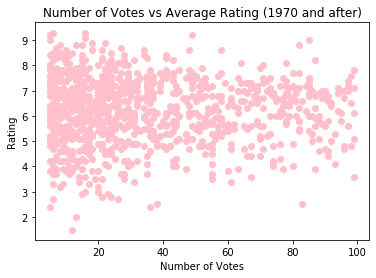

In [21]:
#plot scatterplot based on movies after 1970
plt.title("Number of Votes vs Average Rating (1970 and after)")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(s_1970_x, s_1970_y, marker = "o", color = "pink")
plt.show()

In [22]:
print(f"The correlation coefficient between Number of Votes and Rating is {round(st.pearsonr(s_1970_x, s_1970_y)[0],2)}")

The correlation coefficient between Number of Votes and Rating is -0.01


In [23]:
new_df = final_df.loc[final_df["numVotes"] > 50000]
new_df

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
513,tt0010323,The Cabinet of Dr. Caligari,1920,76,"Fantasy,Horror,Mystery",8.1,53531
735,tt0012349,The Kid,1921,68,"Comedy,Drama,Family",8.3,104851
883,tt0013442,Nosferatu,1922,94,"Fantasy,Horror",7.9,84570
1236,tt0015648,Battleship Potemkin,1925,75,"Drama,History,Thriller",8.0,50354
1277,tt0015864,The Gold Rush,1925,95,"Adventure,Comedy,Drama",8.2,94133
...,...,...,...,...,...,...,...
100083,tt0942385,Tropic Thunder,2008,107,"Action,Comedy,War",7.0,365037
100116,tt0944835,Salt,2010,100,"Action,Mystery,Thriller",6.4,285909
100160,tt0947798,Black Swan,2010,108,"Drama,Thriller",8.0,673503
100162,tt0947810,Green Zone,2010,115,"Action,Drama,Thriller",6.8,125734


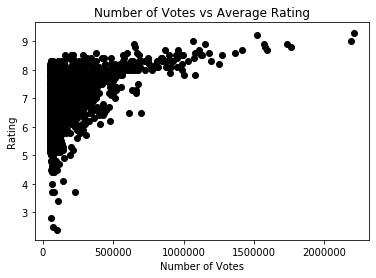

In [24]:
new_x = new_df["numVotes"]
new_y = new_df["averageRating"]

plt.title("Number of Votes vs Average Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.scatter(new_x, new_y, marker = "o", color = "black")
plt.show()

#### Conclusion: Every correlation coefficient calculated indicates that there is no correlation between the number of votes and movie recieves and the rating of the movie.

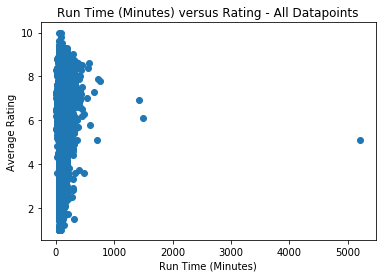

In [31]:
x_values = final_df["runtimeMinutes"]
y_values = final_df["averageRating"]

plt.title("Run Time (Minutes) versus Rating - All Datapoints")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [34]:
final_df["runtimeMinutes"].describe()

count    100255.000000
mean         94.292404
std          30.147896
min           2.000000
25%          83.000000
50%          92.000000
75%         102.000000
max        5220.000000
Name: runtimeMinutes, dtype: float64

In [35]:
under1000_df = final_df.loc[final_df["runtimeMinutes"]<1000]
under1000_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442
100252,474798,tt0953659,A Suitcaseful of Sex,1971,93,Comedy,5.4,22
100253,474868,tt0953903,Year 1863,1922,93,"Drama,History,Romance",6.4,15


In [36]:
under1000_df["runtimeMinutes"].describe()

count    100252.000000
mean         94.213951
std          24.685863
min           2.000000
25%          83.000000
50%          92.000000
75%         102.000000
max         763.000000
Name: runtimeMinutes, dtype: float64

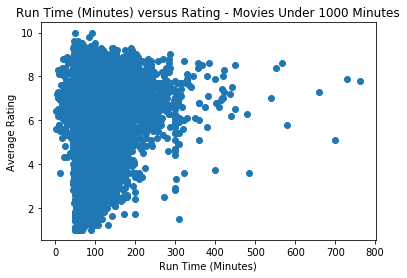

In [37]:
x_values = under1000_df["runtimeMinutes"]
y_values = under1000_df["averageRating"]

plt.title("Run Time (Minutes) versus Rating - Movies Under 1000 Minutes")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [38]:
under500_df = final_df.loc[final_df["runtimeMinutes"]<500]
under500_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442
100252,474798,tt0953659,A Suitcaseful of Sex,1971,93,Comedy,5.4,22
100253,474868,tt0953903,Year 1863,1922,93,"Drama,History,Romance",6.4,15


In [39]:
under500_df["runtimeMinutes"].describe()

count    100244.000000
mean         94.170713
std          24.196600
min           2.000000
25%          83.000000
50%          92.000000
75%         102.000000
max         485.000000
Name: runtimeMinutes, dtype: float64

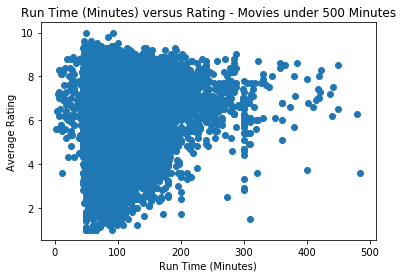

In [40]:
x_values = under500_df["runtimeMinutes"]
y_values = under500_df["averageRating"]

plt.title("Run Time (Minutes) versus Rating - Movies under 500 Minutes")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [41]:
after1970_df = under500_df.loc[under500_df["startYear"]>=1970]
after1970_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,15867,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
9811,19543,tt0035423,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,76547
10463,20650,tt0036606,"Another Time, Another Place",1983,118,"Drama,War",6.5,246
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
20727,37589,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185
...,...,...,...,...,...,...,...,...
100248,474772,tt0953478,Lilla sp??ket Laban,2006,45,"Animation,Family",6.3,63
100249,474773,tt0953483,Made in GDR - Alles ?ªber meine Freunde,2007,93,Documentary,7.4,5
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442


In [42]:
after1970_df["runtimeMinutes"].describe()

count    64128.000000
mean        97.161911
std         22.495409
min          2.000000
25%         86.000000
50%         94.000000
75%        105.000000
max        450.000000
Name: runtimeMinutes, dtype: float64

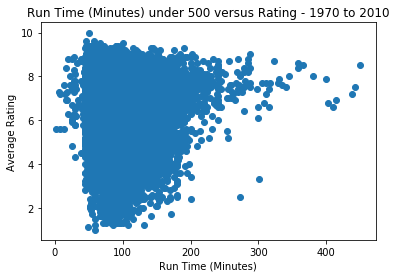

In [43]:
x_values = after1970_df["runtimeMinutes"]
y_values = after1970_df["averageRating"]

plt.title("Run Time (Minutes) under 500 versus Rating - 1970 to 2010")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [47]:
under100_df = after1970_df.loc[after1970_df["runtimeMinutes"]<=100]
under100_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,15867,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
20727,37589,tt0054724,I Eat Your Skin,1971,92,Horror,3.5,1185
23235,41843,tt0058950,"Auliban, the Seller of Rings",1973,95,"Comedy,Musical",7.0,121
23667,42566,tt0059680,Satan's Harvest,1970,88,Action,3.9,102
...,...,...,...,...,...,...,...,...
100245,474733,tt0953382,Trouble at Timpetill,2008,95,"Adventure,Family,Fantasy",5.8,838
100247,474739,tt0953415,Go-Go Motel,2003,73,Thriller,7.1,11
100248,474772,tt0953478,Lilla sp??ket Laban,2006,45,"Animation,Family",6.3,63
100249,474773,tt0953483,Made in GDR - Alles ?ªber meine Freunde,2007,93,Documentary,7.4,5


In [48]:
under100_df["runtimeMinutes"].describe()

count    44130.000000
mean        86.537571
std         11.469035
min          2.000000
25%         83.000000
50%         90.000000
75%         94.000000
max        100.000000
Name: runtimeMinutes, dtype: float64

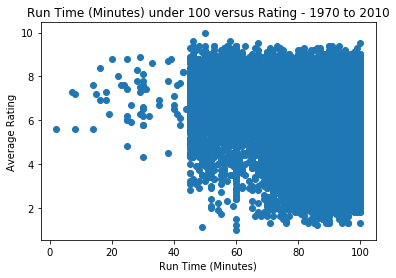

In [49]:
x_values = under100_df["runtimeMinutes"]
y_values = under100_df["averageRating"]

plt.title("Run Time (Minutes) under 100 versus Rating - 1970 to 2010")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [50]:
drama_df = under100_df.loc[under100_df["genres"]=="Drama"]
drama_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
12060,23244,tt0039442,"Habla, mudita",1973,88,Drama,6.2,125
24977,44932,tt0062181,Rece do g??ry,1981,76,Drama,6.6,283
25067,45096,tt0062359,The Bull Buster,1973,90,Drama,7.0,21
25329,45576,tt0062847,"Daddy, Darling",1970,83,Drama,4.9,278
25416,45709,tt0062980,Fleshpot on 42nd Street,1973,87,Drama,6.0,191
...,...,...,...,...,...,...,...,...
100199,473828,tt0949875,The New Twenty,2008,92,Drama,5.1,458
100206,473953,tt0950683,Beat the Air,2006,92,Drama,8.2,6
100207,473960,tt0950695,Heisses Blut oder Vivienne del Vargos' letzter...,2005,60,Drama,6.7,96
100228,474232,tt0951338,The Summoning of Everyman,2007,50,Drama,8.8,5


In [51]:
drama_df["runtimeMinutes"].describe()

count    7931.000000
mean       87.448493
std        10.511746
min         8.000000
25%        83.000000
50%        90.000000
75%        95.000000
max       100.000000
Name: runtimeMinutes, dtype: float64

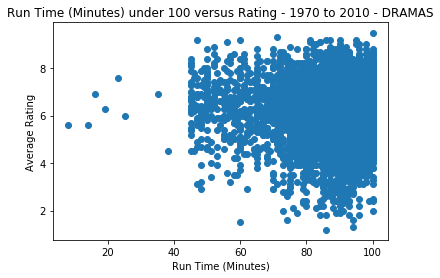

In [52]:
x_values = drama_df["runtimeMinutes"]
y_values = drama_df["averageRating"]

plt.title("Run Time (Minutes) under 100 versus Rating - 1970 to 2010 - DRAMAS")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [53]:
comedy_df = under100_df.loc[under100_df["genres"]=="Comedy"]
comedy_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
7665,15867,tt0031458,El hu??sped del sevillano,1970,86,Comedy,7.1,8
25806,46383,tt0063666,"Love, Emilia",1970,74,Comedy,6.9,53
25849,46459,tt0063751,The Howl,1970,93,Comedy,5.5,322
25929,46687,tt0063982,El abominable hombre de la Costa del Sol,1970,86,Comedy,4.2,28
25954,46725,tt0064021,"Love Is Gay, Love Is Sad",1971,95,Comedy,5.9,112
...,...,...,...,...,...,...,...,...
100152,472869,tt0947006,"Evo, vdej se!",1984,78,Comedy,5.1,13
100218,474169,tt0951224,Polisz kicz projekt... kontratakuje,2006,85,Comedy,3.7,27
100223,474199,tt0951288,When a Man Comes Home,2007,100,Comedy,5.5,756
100230,474250,tt0951368,All About My Bush,2007,97,Comedy,3.4,680


In [54]:
comedy_df["runtimeMinutes"].describe()

count    5407.000000
mean       88.412058
std         8.497306
min        22.000000
25%        85.000000
50%        90.000000
75%        94.000000
max       100.000000
Name: runtimeMinutes, dtype: float64

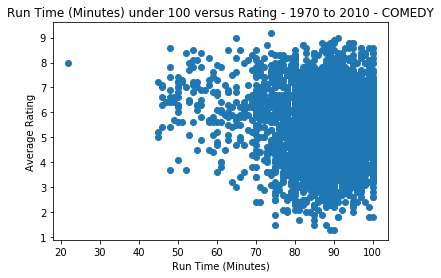

In [55]:
x_values = comedy_df["runtimeMinutes"]
y_values = comedy_df["averageRating"]

plt.title("Run Time (Minutes) under 100 versus Rating - 1970 to 2010 - COMEDY")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [56]:
documentary_df = under100_df.loc[under100_df["genres"]=="Documentary"]
documentary_df

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
25734,46255,tt0063550,Satanis: The Devil's Mass,1970,86,Documentary,5.8,396
26369,47413,tt0064706,My Girlfriend's Wedding,1973,60,Documentary,6.4,60
26675,47922,tt0065227,Sex Freedom in Germany,1970,83,Documentary,4.6,13
26735,48100,tt0065411,Apa ca un bivol negru,1970,62,Documentary,8.5,25
26755,48140,tt0065453,"Cuba: Battle of the 10,000,000",1971,58,Documentary,8.1,17
...,...,...,...,...,...,...,...,...
100232,474257,tt0951379,Rejoice,2004,48,Documentary,8.0,7
100233,474569,tt0952642,Bhopal: The Search for Justice,2004,52,Documentary,8.1,15
100240,474717,tt0953303,American Fugitive: The Truth About Hassan,2006,75,Documentary,7.2,15
100243,474729,tt0953363,Dalai Lama Renaissance,2007,81,Documentary,6.8,52


In [57]:
documentary_df["runtimeMinutes"].describe()

count    4178.000000
mean       72.868597
std        16.190428
min         2.000000
25%        58.000000
50%        75.000000
75%        87.000000
max       100.000000
Name: runtimeMinutes, dtype: float64

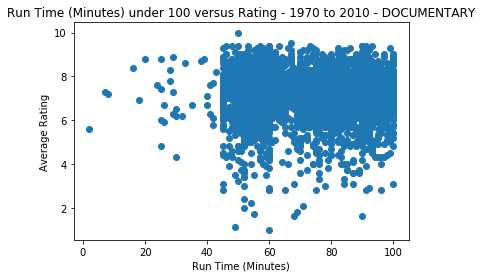

In [58]:
x_values = documentary_df["runtimeMinutes"]
y_values = documentary_df["averageRating"]

plt.title("Run Time (Minutes) under 100 versus Rating - 1970 to 2010 - DOCUMENTARY")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Average Rating")
plt.scatter(x_values, y_values)
plt.show()

In [8]:
# Split up data into groups based on year released
year_group = final_df.groupby('startYear')
year_group.head()

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
69278,161891,tt0233985,Jeffries-Johnson World's Championship Boxing C...,1910,100,"Documentary,Sport",5.7,86
76923,190624,tt0289146,Darkness,2009,100,"Horror,Mystery,Thriller",4.6,159
77266,191913,tt0291338,May Day Parade,1900,66,News,6.4,8
78831,199255,tt0304876,Live Wire,2009,81,Comedy,5.4,79


In [9]:
years = final_df['startYear'].unique()
years

array([1894, 1906, 1908, 1910, 1909, 1911, 1912, 1919, 1913, 1914, 1915,
       1936, 1925, 1916, 1917, 1918, 1920, 1921, 1924, 1923, 1922, 1927,
       1929, 1926, 1935, 1928, 1942, 1933, 1930, 1932, 1931, 1937, 1950,
       1938, 1951, 1939, 1934, 1946, 1940, 1944, 1947, 1970, 1957, 1943,
       1941, 1945, 1952, 1948, 2001, 1953, 1954, 1983, 1949, 1973, 1962,
       1958, 1955, 1956, 1961, 1964, 1960, 1959, 1967, 1963, 1968, 1965,
       1971, 1969, 1966, 1990, 1972, 1979, 1987, 1981, 1978, 2010, 1974,
       1989, 1976, 1977, 1975, 1986, 1985, 1984, 1995, 1982, 1988, 1980,
       1991, 1993, 1992, 2005, 1998, 1999, 1994, 1997, 2000, 1996, 2004,
       2002, 2006, 2008, 2007, 2003, 2009, 1904, 1899, 1900], dtype=int64)

In [10]:
# # Find number of movies in each year
no_released = year_group['primaryTitle'].count()
no_released

startYear
1894       1
1899       1
1900       1
1904       1
1906       1
        ... 
2006    3108
2007    1622
2008     684
2009     264
2010     134
Name: primaryTitle, Length: 108, dtype: int64

In [11]:
# # Find sum of ratings for each year
rating_sum = year_group['averageRating'].sum()
rating_sum

startYear
1894        5.3
1899        3.8
1900        6.4
1904        5.3
1906        6.1
         ...   
2006    19036.8
2007     9665.4
2008     3955.4
2009     1535.2
2010      783.5
Name: averageRating, Length: 108, dtype: float64

In [12]:
# # # # Find average rating of all movies in each year
avg_by_year = rating_sum / no_released
avg_by_year

startYear
1894    5.300000
1899    3.800000
1900    6.400000
1904    5.300000
1906    6.100000
          ...   
2006    6.125097
2007    5.958940
2008    5.782749
2009    5.815152
2010    5.847015
Length: 108, dtype: float64

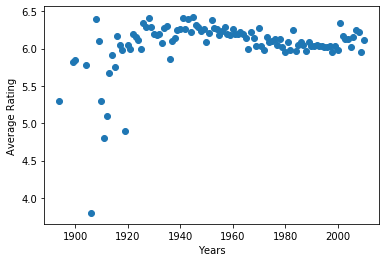

In [13]:
# Create scatter plot to compare average ratings by year
x_values = years
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Average Rating')
plt.show()

In [14]:
# # Create equation of line to calculate predicted movie rating based on year
# slope, int, r, p, std_err = stats.linregress(x_values, y_values)
# # Plot the linear model on top of scatter plot 
# fit = slope * x_values + int
# x_values = years
# y_values = avg_by_year
# plt.scatter(x_values,y_values)
# plt.plot(x_values,fit,"--")
# plt.xlabel('Year')
# plt.ylabel('Average Rating')
# plt.show()

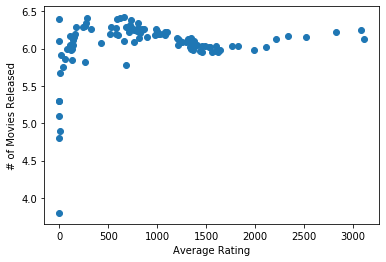

In [15]:
# Create scatter plot to compare average ratings by year
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values, y_values)
plt.xlabel('Average Rating')
plt.ylabel('# of Movies Released')
plt.show()

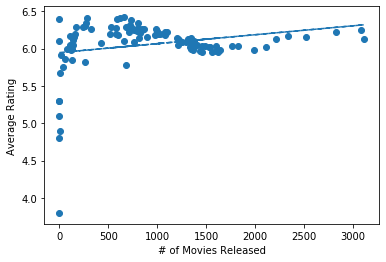

In [16]:
# Create equation of line to calculate predicted violent crime rate
no_slope, no_int, no_r, no_p, no_std_err = stats.linregress(x_values, y_values)
# Plot the linear model on top of scatter plot 
no_fit = no_slope * x_values + no_int
x_values = no_released
y_values = avg_by_year
plt.scatter(x_values,y_values)
plt.plot(x_values,no_fit,"--")
plt.xlabel('# of Movies Released')
plt.ylabel('Average Rating')
plt.show()

In [19]:
final_df['startYear'].describe()

count    100255.000000
mean       1976.427360
std          23.388476
min        1894.000000
25%        1960.000000
50%        1980.000000
75%        1997.000000
max        2010.000000
Name: startYear, dtype: float64

In [2]:
#Selecting only relevant columns 
ranking_df = movie_metadata.loc[:, ["genres", "startYear","averageRating"]]
ranking_df

,genres,startYear,averageRating
0,Romance,1894,5.3
1,"Biography,Crime,Drama",1906,6.1
2,"Adventure,Fantasy",1908,4.8
3,"Adventure,Drama",1910,3.1
4,Drama,1910,5.7
...,...,...,...
100250,"Drama,History,Thriller",1988,6.6
100251,"Action,Drama",2005,3.2
100252,Comedy,1971,5.4
100253,"Drama,History,Romance",1922,6.4


In [3]:
#Creating bins 
bins = [1970,1980,1990,2000,2010]
year_groups = ["1970-1980","1980-1990","1990-2000","2000-2010"]

ranking_df["Year group"] = pd.cut(ranking_df["startYear"],bins,labels=year_groups)
ranking_df.dropna()

,genres,startYear,averageRating,Year group
9811,"Comedy,Fantasy,Romance",2001,6.4,2000-2010
10463,"Drama,War",1983,6.5,1980-1990
12060,Drama,1973,6.2,1970-1980
20727,Horror,1971,3.5,1970-1980
23235,"Comedy,Musical",1973,7.0,1970-1980
...,...,...,...,...
100248,"Animation,Family",2006,6.3,2000-2010
100249,Documentary,2007,7.4,2000-2010
100250,"Drama,History,Thriller",1988,6.6,1980-1990
100251,"Action,Drama",2005,3.2,2000-2010


In [20]:
year_genres_ct = ranking_df.groupby("Year group")["genres"].value_counts()
genres_df = pd.DataFrame({"Genre Count":year_genres_ct})

In [23]:
genre_metadata = year_genres_ct.reset_index(name = "Genre Count")
genre_metadata

,Year group,genres,Genre Count
0,1970-1980,Drama,2541
1,1970-1980,Comedy,1700
2,1970-1980,Documentary,456
3,1970-1980,"Drama,Romance",427
4,1970-1980,"Comedy,Drama",397
...,...,...,...
2079,2000-2010,"Musical,Sci-Fi,Thriller",1
2080,2000-2010,"Musical,War",1
2081,2000-2010,"Mystery,Romance,Sci-Fi",1
2082,2000-2010,"Romance,Sci-Fi,Thriller",1


In [24]:
yg1970 = genre_metadata.loc[genre_metadata["Year group"] =="1970-1980"]
yg1970_sorted = yg1970.sort_values(by=["Genre Count"],ascending = False)
yg1970_top3 = yg1970_sorted.iloc[0:3]
yg1970_top3

,Year group,genres,Genre Count
0,1970-1980,Drama,2541
1,1970-1980,Comedy,1700
2,1970-1980,Documentary,456


In [25]:
yg1980 = genre_metadata.loc[genre_metadata["Year group"] =="1980-1990"]
yg1980_sorted = yg1980.sort_values(by=["Genre Count"],ascending = False)
yg1980_top3 = yg1980_sorted.iloc[0:3]
yg1980_top3

,Year group,genres,Genre Count
502,1980-1990,Drama,2951
503,1980-1990,Comedy,1649
504,1980-1990,Documentary,566


In [26]:
yg1990 = genre_metadata.loc[genre_metadata["Year group"] =="1990-2000"]
yg1990_sorted = yg1990.sort_values(by=["Genre Count"],ascending = False)
yg1990_top3 = yg1990_sorted.iloc[0:3]
yg1990_top3

,Year group,genres,Genre Count
1016,1990-2000,Drama,3009
1017,1990-2000,Comedy,1542
1018,1990-2000,Documentary,1250


In [27]:
yg2000 = genre_metadata.loc[genre_metadata["Year group"] =="2000-2010"]
yg2000_sorted = yg2000.sort_values(by=["Genre Count"],ascending = False)
yg2000_top3 = yg2000_sorted.iloc[0:3]
yg2000_top3

,Year group,genres,Genre Count
1543,2000-2010,Drama,3523
1544,2000-2010,Documentary,2456
1545,2000-2010,Comedy,1539


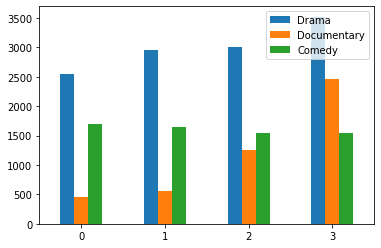

In [28]:
Drama = [2541,2951,3009,3523]
Documentary = [456, 566,1250,2456]
Comedy = [1700,1649,1542,1539]

df = pd.DataFrame({"Drama": Drama, "Documentary": Documentary, "Comedy": Comedy})

ax = df.plot.bar(rot=0)

In [29]:
year_genres_ranking = ranking_df.groupby(["Year group","genres"])["averageRating"].mean()
year_genres_ranking

Year group  genres                    
1970-1980   Action                        5.857143
            Action,Adventure              5.644318
            Action,Adventure,Animation    6.928571
            Action,Adventure,Biography    5.940000
            Action,Adventure,Comedy       5.571930
                                            ...   
2000-2010   Thriller,War                  6.500000
            Thriller,Western              4.200000
            War                           6.816667
            War,Western                        NaN
            Western                       4.956250
Name: averageRating, Length: 3744, dtype: float64

In [61]:
avgranking_genre = pd.DataFrame({"Average Ranking": year_genres_ranking})
generating_df = avgranking_genre.reset_index()
generating_df 

,Year group,genres,Average Ranking
0,1970-1980,Action,5.857143
1,1970-1980,"Action,Adventure",5.644318
2,1970-1980,"Action,Adventure,Animation",6.928571
3,1970-1980,"Action,Adventure,Biography",5.940000
4,1970-1980,"Action,Adventure,Comedy",5.571930
...,...,...,...
3739,2000-2010,"Thriller,War",6.500000
3740,2000-2010,"Thriller,Western",4.200000
3741,2000-2010,War,6.816667
3742,2000-2010,"War,Western",NaN


In [32]:
#1970 ratings 
yg1970_doc = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Documentary")]
yg1970_doc_rating = round(yg1970_doc["Average Ranking"],2)

yg1970_com = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Comedy")]
yg1970_com_rating = round(yg1970_com["Average Ranking"],2)
                              
yg1970_dra = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Drama")]
yg1970_dra_rating = round(yg1970_dra["Average Ranking"],2)

In [33]:
#1980 ratings 
yg1980_doc = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Documentary")]
yg1980_doc_rating = round(yg1980_doc["Average Ranking"],2)

yg1980_com = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Comedy")]
yg1980_com_rating = round(yg1980_com["Average Ranking"],2)
                              
yg1980_dra = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Drama")]
yg1980_dra_rating = round(yg1980_dra["Average Ranking"],2)

In [34]:
#1990 ratings 
yg1990_doc = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Documentary")]
yg1990_doc_rating = round(yg1990_doc["Average Ranking"],2)

yg1990_com = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Comedy")]
yg1990_com_rating = round(yg1990_com["Average Ranking"],2)
                              
yg1990_dra = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Drama")]
yg1990_dra_rating = round(yg1990_dra["Average Ranking"],2)

In [48]:
#2000 ratings 
yg2000_doc = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Documentary")]
yg2000_doc_rating = round(yg2000_doc["Average Ranking"],2)

yg2000_com = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Comedy")]
yg2000_com_rating = round(yg2000_com["Average Ranking"],2)
                              
yg2000_dra = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Drama")]
yg2000_dra_rating = round(yg2000_dra["Average Ranking"],2)




6.36

In [53]:
yrs = ["1970-1980","1980-1990","1990-2000","2000-2010"]
dra_rating = [yg1970_dra_rating.iloc[0],yg1980_dra_rating.iloc[0],yg1990_dra_rating.iloc[0],yg2000_dra_rating.iloc[0]]
doc_rating = [yg1970_doc_rating.iloc[0],yg1980_doc_rating.iloc[0],yg1990_doc_rating.iloc[0],yg2000_doc_rating.iloc[0]]
com_rating = [yg1970_com_rating.iloc[0],yg1980_com_rating.iloc[0],yg1990_com_rating.iloc[0],yg2000_com_rating.iloc[0]]

df = pd.DataFrame({"Years": yrs, "Drama": dra_rating, "Documentary": doc_rating, "Comedy": com_rating})
df

,Years,Drama,Documentary,Comedy
0,1970-1980,6.33,6.91,5.45
1,1980-1990,6.34,7.19,5.60
2,1990-2000,6.33,7.08,5.63
3,2000-2010,6.36,7.28,5.77


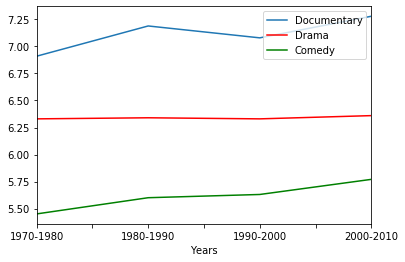

In [60]:
ax = plt.gca()

df.plot(kind='line',x='Years',y='Documentary', ax=ax)
df.plot(kind='line',x='Years',y='Drama', color="red", ax=ax)
df.plot(kind='line',x='Years',y='Comedy', color="green", ax=ax)

#df.plot(kind='line',x='yrs',y='num_pets', color='red', ax=ax)